# Analysis By Knowledge Types

This notebook provides some samples of the requests that can be made using the *KnowledgeType* class from the module '*scripts/knowledge_type.py*'.

*KnowledgeType* contains the following methods:
- *all_docs*: Returns a Venn diagram and a count table of document by knowledge type
- *crosstable*: Returns a crosstable of document by knowledge type compared to a user-defined data column
- *docs_list*: Returns a list of documents for each knowledge type and save them in CSV and XLSX

To execute this notebook, please start by running the initialization script below. Then, you can run and modify the other code cells according to your needs. 

In [1]:
# Import required libraries
from pathlib import Path
from datetime import datetime
import logging

# Define constants
LOGS_DIR = Path('logs')
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
LOGS_FILE = LOGS_DIR / f"knowledge_type_{timestamp}.log"
PDF_LIST = Path('data/pdf_list.csv')
DB_PATH = Path('data/database.db')

# Set up logging
logging.basicConfig(
    filename=LOGS_FILE,
    level=logging.INFO,
    format='%(asctime)s:%(levelname)s:%(message)s'
    )

## Venn diagram

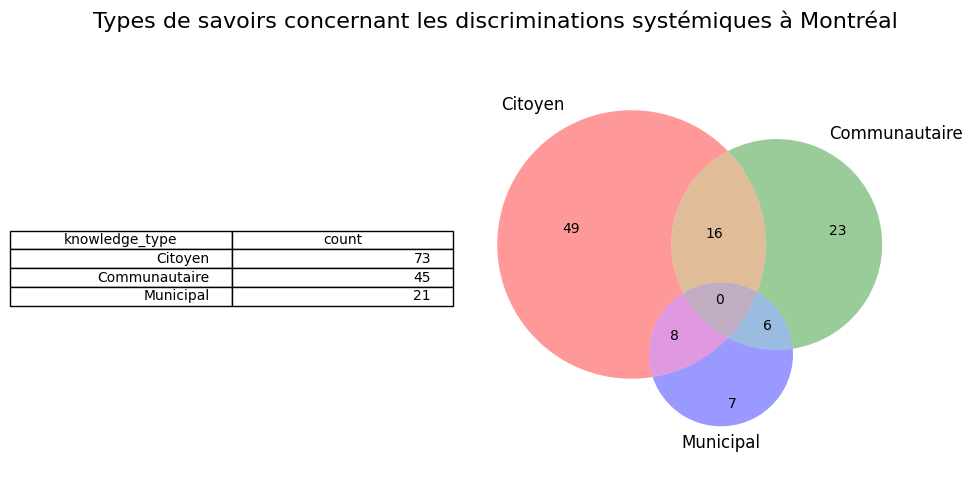

In [2]:
from scripts.knowledge_type import KnowledgeType

test = KnowledgeType(DB_PATH).all_docs()

## Knowledge Type Crosstable

In [3]:
from scripts.knowledge_type import KnowledgeType

table = KnowledgeType(DB_PATH).crosstable(compare_with='category')

knowledge_type                                   Citoyen  Communautaire  \
category                                                                  
Chercheurs et experts                                  9              5   
Citoyens et particuliers                              44              1   
Organismes communautaires et à but non-lucratif       13             30   
Organismes municipaux et paramunicipaux                2              6   
Personalités et organisations politiques               3              0   
Regroupements et réseaux                               2              3   
Total                                                 73             45   

knowledge_type                                   Municipal  Total  
category                                                           
Chercheurs et experts                                    5     19  
Citoyens et particuliers                                 1     46  
Organismes communautaires et à but non-lucratif     

## Document List By Knowledge Type

In [4]:
from scripts.knowledge_type import KnowledgeType

communautaire_table = KnowledgeType(DB_PATH).docs_list(knowledge_type='Communautaire')
municipal_table = KnowledgeType(DB_PATH).docs_list(knowledge_type='Municipal')
citoyen_table = KnowledgeType(DB_PATH).docs_list(knowledge_type='Citoyen')

Filtered dataframe saved to 'doc_list_knowledge_type_Communautaire.csv' and 'docs_list_knowledge_type_Communautaire.xlsx'
Filtered dataframe saved to 'doc_list_knowledge_type_Municipal.csv' and 'docs_list_knowledge_type_Municipal.xlsx'
Filtered dataframe saved to 'doc_list_knowledge_type_Citoyen.csv' and 'docs_list_knowledge_type_Citoyen.xlsx'
